**Product Brief**

Бизнес-проблема: 

Очистить данные для последующей обработки и спрогнозировать таргет 1. 

**Критерии успеха.** измерить метрику F1 

Входные данные. Исторические данные о поведении клиентов и расторжении договоров с банком.

**Ожидаемые результаты и их формат.**

Построить модель с лучшим значением F1 и дополнительно измерить AUC-ROC.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import shuffle, resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm
import shap # для feature engineering

pd.options.display.max_columns = None

In [2]:
try:
    data = pd.read_csv(r'D:\Data Science\Тестовые\Срочноденьги\data.csv', delimiter=';')
    verify = pd.read_csv(r'D:\Data Science\Тестовые\Срочноденьги\verify.csv', delimiter=';')
except:
    data = pd.read_csv(r'Your path', delimiter=';')
    verify = pd.read_csv(r'Your path', delimiter=';')

In [3]:
data.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,target
0,1,1,0,0,1381,63,0,0,1,0,0,0,1,0,0,0,0,229,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25000,10330,20330,35000,0,0,0.0,140.0,0.02,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,19,24,956,4,50.0,345,0.069565,0.692252,0,13,0,0.0,4,0.0,1,39,0,2.0,20,0.05,61.0,0.0,23.0,100.0,0.610000,0,4,0.210526,0,0,0,0.000000,0,0,0,0,0,0.0,7000,4000,7526.3157,12000,0.583333,0
1,2,0,0,0,1809,33,1,0,1,0,0,1,0,0,0,0,0,67,2,0.7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,22000,25000,25000,55000,0,1,0.0,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,61,4,407,1,6.0,24,0.166667,0.224986,0,1,0,0.0,1,0.0,0,2,0,0.0,1,0.00,0.0,0.0,23.0,208.0,0.000000,1,5,0.081967,0,0,0,0.000000,0,0,0,0,0,0.0,10000,1000,8393.4426,30000,0.333333,0
2,3,0,0,0,1804,29,0,1,0,0,0,1,0,0,0,0,0,185,0,3.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,5000,30000,40000,40000,0,1,0.0,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,54,3,1178,1,21.0,123,0.024390,0.652993,0,20,0,0.0,8,0.0,0,18,0,0.0,5,0.00,16.0,0.0,11.0,115.0,0.139130,0,3,0.055556,0,5,5,0.092593,0,1,0,0,0,0.0,3000,1000,3425.9259,15000,0.200000,0
3,4,0,0,0,1560,28,1,1,0,0,0,0,1,0,0,0,0,252,1,5.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,10000,25000,25000,25000,0,1,0.0,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,75,8,623,0,8.0,37,0.216216,0.399359,0,4,0,0.0,1,0.0,0,16,0,0.0,3,0.00,5.0,1.0,12.0,116.0,0.043103,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,2000,1000,1946.6666,3000,0.666667,0
4,5,0,0,0,258,33,1,0,0,0,1,0,1,0,0,0,0,4,2,0.1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,10000,17000,25400,25400,0,1,0.0,0.0,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,9,10,77,1,8.0,18,0.555556,0.298450,0,2,0,0.0,1,0.0,0,0,0,0.0,0,1.00,1.0,1.0,4.0,14.0,0.071429,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,2000,2000,4444.4444,8000,0.250000,0


In [4]:
verify.head()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
0,255821,0,0,0,2268,34,0,1,0,0,0,0,0,0,1,0,1,119,0,6.3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,11000,28000,35000,35000,0,1,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,49,14,804,0,16.0,261,0.053640,0.354497,7,61,0,1.0,8,0.875,0,1,0,0.0,1,0.0,42.0,0.0,30.0,239.0,0.175732,0,2,0.040816,0,1,1,0.020408,0,1,0,0,0,0.0,6000,1000,4551.0204,12000,0.500000
1,255822,0,0,0,42,49,0,0,1,0,0,0,1,0,0,0,0,265,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,8600,19600,35000,0,0,0.0,1000.0,0.166666,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,13,22,9,11.0,13,1.000000,0.523810,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,20.0,20.0,20.0,20.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,6000,3400,4700.0000,6000,1.000000
2,255823,0,0,0,265,69,0,1,0,0,0,0,0,1,0,0,1,134,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5000,10000,10000,10000,0,0,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,3,16,45,14,15.0,16,1.000000,0.169811,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,203.0,17.0,110.0,203.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,3000,3000,4133.3333,6000,0.500000
3,255824,1,0,0,834,25,1,0,1,0,0,0,1,0,0,0,0,34,0,0.3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,10000,40000,50000,80000,0,1,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,32,37,187,1,5.0,37,1.000000,0.224221,4,15,0,0.0,4,1.000,0,5,0,0.0,4,0.0,15.0,0.0,20.0,185.0,0.081081,0,1,0.031250,0,0,0,0.000000,0,0,0,0,0,0.0,2000,1000,3875.0000,11000,0.181818
4,255825,0,0,0,772,26,1,1,0,0,0,0,0,1,0,0,1,80,1,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,7000,16000,17500,30000,0,1,0.0,1200.0,0.150000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,5,2,120,1,24.0,90,0.022222,0.155440,0,1,0,0.0,1,0.000,0,0,0,0.0,0,1.0,142.0,1.0,163.0,488.0,0.290984,0,0,0.000000,0,1,1,0.200000,0,1,0,0,0,0.0,8000,2000,7640.0000,12000,0.666667


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255820 entries, 0 to 255819
Columns: 126 entries, ID to target
dtypes: float64(21), int64(105)
memory usage: 245.9 MB


In [6]:
data.columns

Index(['ID', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9',
       ...
       'feature_116', 'feature_117', 'feature_118', 'feature_119',
       'feature_120', 'feature_121', 'feature_122', 'feature_123',
       'feature_124', 'target'],
      dtype='object', length=126)

In [7]:
data.describe()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,target
count,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,2.558200e+05,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,218025.000000,218025.000000,218025.000000,218025.000000,213927.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000,255820.000000
mean,127910.500000,0.356731,0.147756,0.002564,819.453049,41.053213,0.412751,0.355516,0.372434,0.063498,0.141439,0.252834,0.560292,0.141787,0.035908,0.005692,0.183387,135.139758,0.507169,3.290838,0.003287,0.010605,0.008901,0.150469,0.014792,0.088445,0.254484,0.000160,0.209214,0.021906,0.596498,0.169416,0.001560,0.223610,0.145157,0.009225,0.046419,0.001177,0.154918,0.121417,0.065366,0.006317,0.372195,0.143816,0.020233,0.051388,0.013060,9128.381995,24710.608467,29409.935494,4.191040e+04,0.000004,0.316797,0.848258,516.821102,0.060603,0.186166,0.045247,0.086248,0.027058,0.035005,0.039184,0.022946,0.101313,0.053463,0.087003,0.014334,0.063541,0.000946,0.011105,0.012466,0.037167,0.023173,0.014135,0.121859,0.017637,0.001040,0.850962,0.088152,0.007716,0.893273,0.205203,15.799453,26.475092,255.822543,8.725084,22.538871,61.842858,0.534262,0

In [8]:
data.isna().sum().sort_values(ascending=False).head(10)

feature_106    41893
feature_105    37795
feature_104    37795
feature_103    37795
feature_102    37795
ID                 0
feature_83         0
feature_82         0
feature_84         0
feature_92         0
dtype: int64

In [9]:
print((data['feature_102'].isna().sum() / data.shape[0]) * 100)

14.774059885857243


In [10]:
data.dropna(inplace=True) 

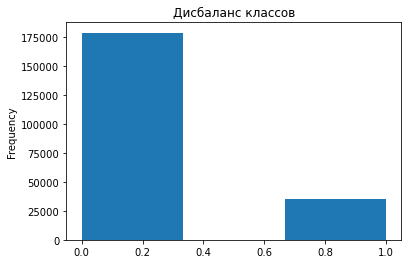

In [11]:
#визуализация баланса target
data['target'].plot(kind='hist', bins=3)
plt.title('Диcбаланс классов')
plt.show()

* Виден дисбаланс таргета 0 и 1, нужно будет приминить увелечение или уменьшение выборки, stratify при сплите данных или class_weight='balanced' в модели

In [12]:
#поиск дубликатов
data.duplicated().sum()

0

In [13]:
data.shape

(213927, 126)

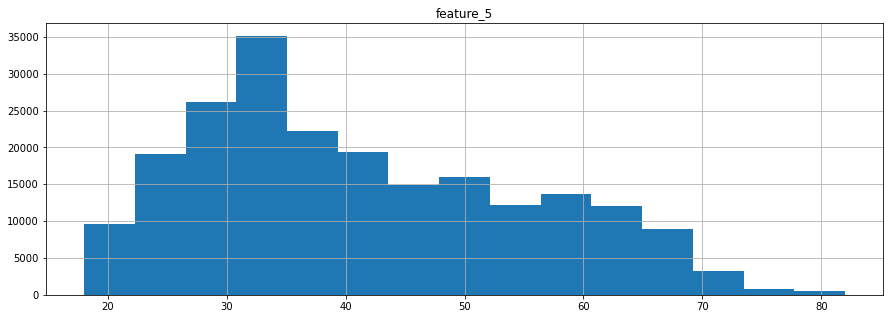

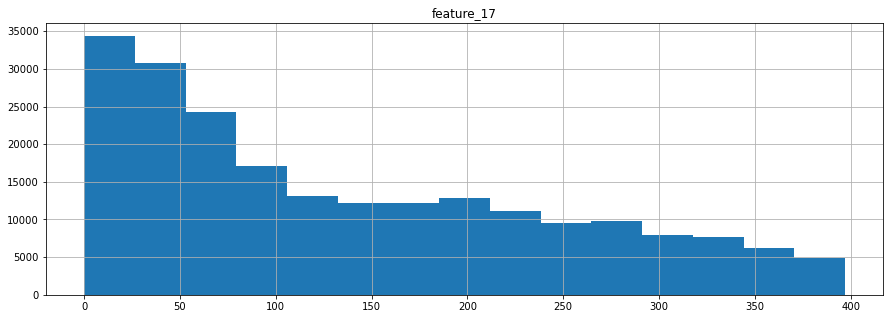

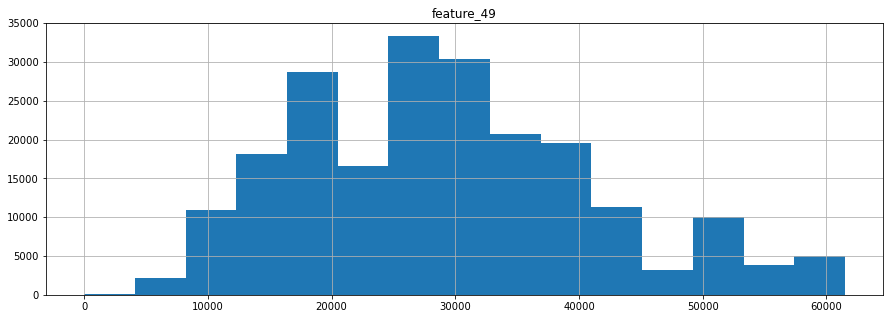

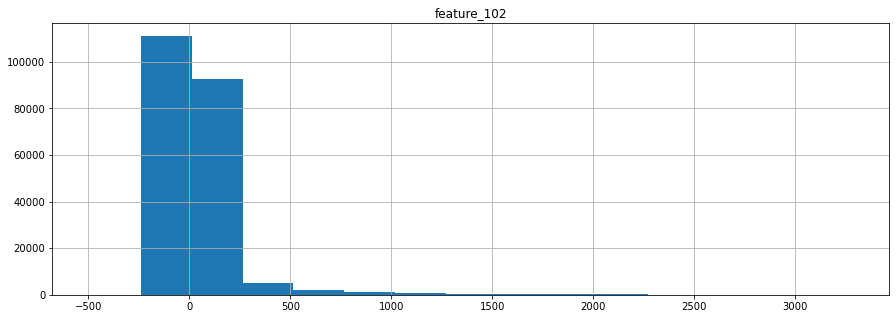

In [14]:
# выбрал несколько признаков, чтобы посмотреть на распределение
hist_features = ['feature_5','feature_17', 'feature_49', 'feature_102']
for column in hist_features:
        data[column].hist(bins = 15,figsize = (15,5))
        plt.title(column)
        plt.show()

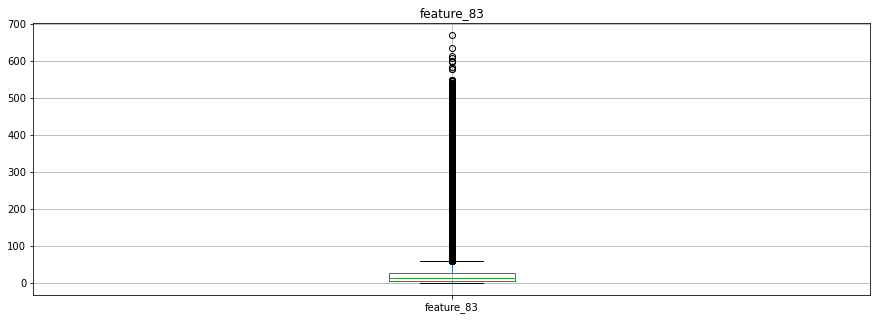

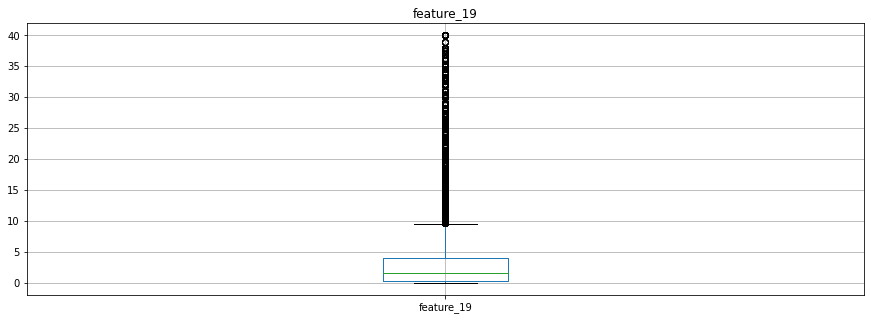

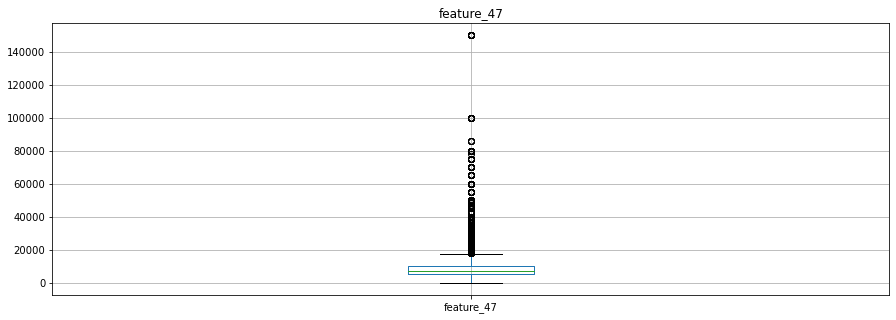

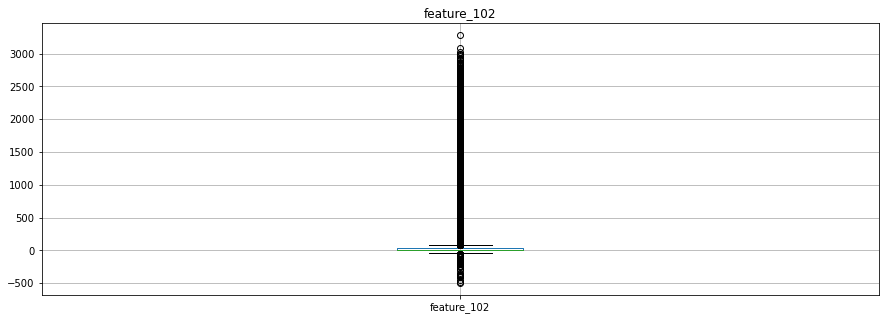

In [15]:
# выбрал несколько признаков, чтобы посмотреть на выбросы
box_features = ['feature_83','feature_19', 'feature_47', 'feature_102']
for column in box_features:
        data.boxplot(column=column, figsize = (15,5))
        plt.title(column)
        plt.show()

In [16]:
data['feature_83'].describe()

count    213927.000000
mean         25.109435
std          40.013743
min           0.000000
25%           5.000000
50%          11.000000
75%          26.000000
max         668.000000
Name: feature_83, dtype: float64

In [17]:
#убираю выбросы в feature_102 и 83
data = data.query(' 4 < feature_102 < 33 & 5 < feature_83 < 22')

**Вывод**
* Зная признаки можно заполнить пропуски медианными значениями или средним, fillna(0) или поставить заглушку -1. Я их просто удалил, чтобы не гадать т.к пропуски в некоторых признаках 14 %. Если пропуски, например были бы 47%, то можно было просто убрать этот признак.
* Выбросы можно отфильтровать для улучшения результатов обучения модели. Например  feature_102, много выбрасов и при первом обучении имела самай большой вес в feature_importances RandomForestClassifer. Когда убрал выбросы, фича потеряла значимость. Для улучшения метрик, нужно рассмотреть каждый признак на выбросы и аномалии.

## 2  Исследование задачи

In [18]:
# # удаляем ненужные колонки
# not_informative = ['ID']
# data = data.drop(not_informative, axis=1)

In [19]:
target = data['target']
features = data.drop(['target'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, stratify=target, test_size=0.3, random_state=12345)


print('Размер обучающей выборки - {}' .format(features_train.shape)) 
print('Размер валидоционной выборки - {}' .format(features_valid.shape)) 

Размер обучающей выборки - (32092, 125)
Размер валидоционной выборки - (13755, 125)


In [20]:
features_valid, features_test, target_valid, target_test= train_test_split(
    features_valid, target_valid, stratify=target_valid, test_size=0.5, random_state=12345)

print('Размер тестовой выборки - {}' .format(features_test.shape)) 
print('Размер валидоционной выборки - {}' .format(features_valid.shape)) 

Размер тестовой выборки - (6878, 125)
Размер валидоционной выборки - (6877, 125)


In [21]:
pd.options.mode.chained_assignment = None

#numeric = []
scaler = StandardScaler()
scaler.fit(features_train)

features_train = scaler.transform(features_train)
features_valid = scaler.transform(features_valid)
features_test = scaler.transform(features_test)

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(32092, 125)
(6877, 125)
(6878, 125)


In [22]:
def models_f1_precision(features_train, target_train, features_valid, target_valid):
    
    model_rf = RandomForestClassifier(max_depth=10, n_estimators=50, min_samples_leaf=5, random_state=12345)
    rf_score = model_rf.fit(features_train, target_train).score(features_valid, target_valid)
    predicted_valid_rf = model_rf.predict(features_valid)
    print("F1 Случайный лес:", f1_score(target_valid, predicted_valid_rf))
    
    model_lr = LogisticRegression(solver = 'liblinear', random_state=12345)
    lr_score = model_lr.fit(features_train, target_train).score(features_valid, target_valid)
    predicted_valid_lr = model_lr.predict(features_valid)
    print("F1 Логистческая регрессия:", f1_score(target_valid, predicted_valid_lr)) # находим метрику F1
    
    print("Точность модели: " "Случайный лес", rf_score, "Логистческая регрессия", lr_score)

In [23]:
models_f1_precision(features_train, target_train, features_valid, target_valid)

F1 Случайный лес: 0.0
F1 Логистческая регрессия: 0.0030075187969924814
Точность модели: Случайный лес 0.9035916824196597 Логистческая регрессия 0.9035916824196597


**Тестируем модель на тестовой выборке**

In [24]:
# lr_score = model_lr.fit(features_train, target_train)
# predicted_test_lr = model_lr.predict(features_test)
# f1_score(target_test, predicted_test_lr)

**Увеличиваем выборку для баланса**

In [25]:
target_train.value_counts(normalize=1)

0    0.903559
1    0.096441
Name: target, dtype: float64

In [26]:
target1 = data[data['target'] == 1]
target0 = data[data['target'] == 0]


In [27]:
target_upsampled = resample(target1, replace=True, n_samples=(target0.shape[0] - target1.shape[0]), random_state=12345)
upsampled = pd.concat([data, target_upsampled])


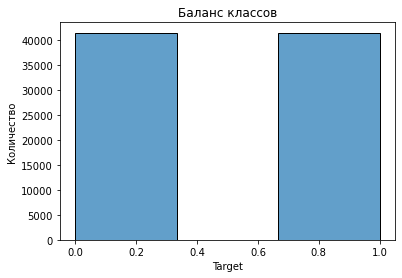

In [28]:
sns.histplot(data=upsampled['target'], bins=3, alpha=0.7)
plt.title('Баланс классов')
plt.xlabel('Target')
plt.ylabel('Количество')
plt.show()

In [29]:
upsampled['target'].value_counts(normalize=1)

0    0.5
1    0.5
Name: target, dtype: float64

In [30]:
target = upsampled['target']
features = upsampled.drop(['target'], axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, stratify=target, test_size=0.3, random_state=12345)

In [31]:
#models_f1_precision(features_train, target_train, features_valid, target_valid)

In [32]:
model_rf = RandomForestClassifier(max_depth=10, n_estimators=50, min_samples_leaf=5, random_state=12345)
rf_score = model_rf.fit(features_train, target_train).score(features_valid, target_valid)
predicted_valid_rf = model_rf.predict(features_valid)
print("F1 Случайный лес:", f1_score(target_valid, predicted_valid_rf))
    
model_lr_v = LogisticRegression(solver = 'liblinear', class_weight='balanced', random_state=12345)
lr_score = model_lr_v.fit(features_train, target_train).score(features_valid, target_valid)
predicted_valid_lr = model_lr_v.predict(features_valid)
print("F1 Логистческая регрессия:", f1_score(target_valid, predicted_valid_lr)) # находим метрику F1

print("Точность модели: " "Случайный лес", rf_score, "Логистческая регрессия", lr_score)

print('roc-auc:', roc_auc_score(target_valid, predicted_valid_lr))
print('precision:', precision_score(target_valid, predicted_valid_lr))
print('recall:', recall_score(target_valid, predicted_valid_lr))
print('f1:', f1_score(target_valid, predicted_valid_lr))



F1 Случайный лес: 0.7844817512561836
F1 Логистческая регрессия: 0.6489403300226793
Точность модели: Случайный лес 0.7773978113936273 Логистческая регрессия 0.6387994850337947
roc-auc: 0.6387994850337946
precision: 0.6312186216339571
recall: 0.6676858706147409
f1: 0.6489403300226793


Liblinear failed to converge, increase the number of iterations.


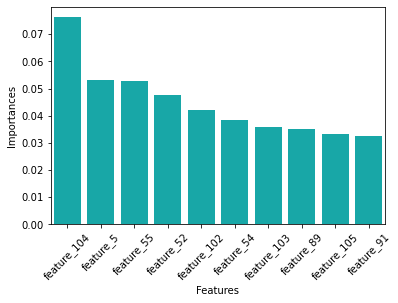

In [33]:
# Создаем DataFrame с признаками
features_df = pd.DataFrame({'Features': features.columns,
             'Importances': model_rf.feature_importances_}).sort_values('Importances', ascending=False).head(10)

# Рисуем барплот
sns.barplot(y='Importances',x='Features', 
           data=features_df, color="c")
plt.xticks(rotation=45)
plt.show()

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


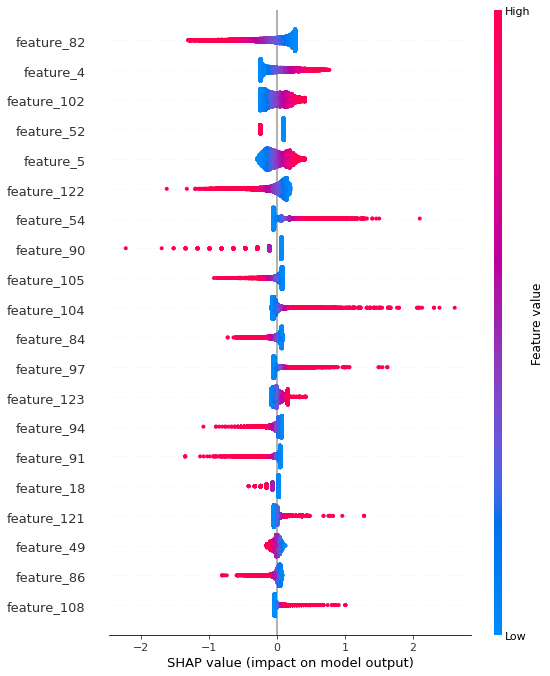

In [34]:
explainer = shap.LinearExplainer(model_lr_v, features_train, feature_dependence="independent")
shap_values = explainer(features_valid)
shap.summary_plot(shap_values, features_valid)


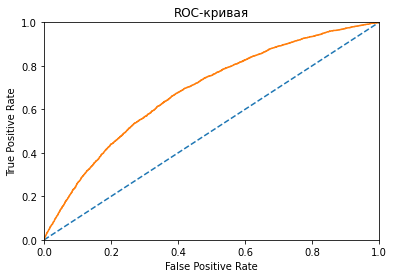

In [35]:
probabilities_valid = model_lr_v.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)                

plt.figure()


# ROC-кривая случайной модели 
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC-кривая")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

In [36]:
roc_auc_score(target_valid, probabilities_one_valid)  

0.684594781875369

Лучше чем 0.5 случайный выбор, номожно улучшить результат

In [37]:
# parameters_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet'],
#     'C': np.linspace(1, 1000, num=5),
#     'solver': ['sag', 'saga', 'lbfgs'],
#     'l1_ratio': [0.25, 0.5, 0.75],
#     'max_iter': np.arange(100, 500, 100)
# }

# lr = LogisticRegression(class_weight='balanced')
# cv = StratifiedKFold(n_splits=3, shuffle=True)
# grid_cv = GridSearchCV(lr, parameters_grid,
#                        scoring='roc_auc', cv=cv, verbose=2)


In [38]:
# best_params  = {'C': 250.75,
#                 'l1_ratio': 0.25, 
#                 'max_iter': 400, 
#                 'penalty': 'l2', 
#                 'solver': 'lbfgs'}


**Verify**

In [39]:
verify.isna().sum().sort_values(ascending=False)

feature_106    12960
feature_102    11459
feature_103    11459
feature_104    11459
feature_105    11459
               ...  
feature_37         0
feature_36         0
feature_35         0
feature_34         0
feature_124        0
Length: 125, dtype: int64

In [40]:
verify.dropna(inplace=True)

In [41]:
verify.head(10)

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124
0,255821,0,0,0,2268,34,0,1,0,0,0,0,0,0,1,0,1,119,0,6.3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,11000,28000,35000,35000,0,1,0.00,0.0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,49,14,804,0,16.0,261,0.053640,0.354497,7,61,0,1.0,8,0.875,0,1,0,0.0,1,0.0,42.0,0.0,30.0,239.0,0.175732,0,2,0.040816,0,1,1,0.020408,0,1,0,0,0,0.0,6000,1000,4551.0204,12000,0.500000
1,255822,0,0,0,42,49,0,0,1,0,0,0,1,0,0,0,0,265,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,8600,19600,35000,0,0,0.00,1000.0,0.166666,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,2,13,22,9,11.0,13,1.000000,0.523810,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,20.0,20.0,20.0,20.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,6000,3400,4700.0000,6000,1.000000
2,255823,0,0,0,265,69,0,1,0,0,0,0,0,1,0,0,1,134,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5000,10000,10000,10000,0,0,0.00,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,3,16,45,14,15.0,16,1.000000,0.169811,0,0,0,0.0,0,1.000,0,0,0,0.0,0,1.0,203.0,17.0,110.0,203.0,1.000000,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,3000,3000,4133.3333,6000,0.500000
3,255824,1,0,0,834,25,1,0,1,0,0,0,1,0,0,0,0,34,0,0.3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,10000,40000,50000,80000,0,1,0.00,0.0,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,32,37,187,1,5.0,37,1.000000,0.224221,4,15,0,0.0,4,1.000,0,5,0,0.0,4,0.0,15.0,0.0,20.0,185.0,0.081081,0,1,0.031250,0,0,0,0.000000,0,0,0,0,0,0.0,2000,1000,3875.0000,11000,0.181818
4,255825,0,0,0,772,26,1,1,0,0,0,0,0,1,0,0,1,80,1,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,7000,16000,17500,30000,0,1,0.00,1200.0,0.150000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,5,2,120,1,24.0,90,0.022222,0.155440,0,1,0,0.0,1,0.000,0,0,0,0.0,0,1.0,142.0,1.0,163.0,488.0,0.290984,0,0,0.000000,0,1,1,0.200000,0,1,0,0,0,0.0,8000,2000,7640.0000,12000,0.666667
5,255826,1,0,0,138,20,0,1,0,0,0,1,0,0,0,0,0,149,0,1.0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10000,35000,35000,35000,0,1,848.24,800.0,0.149840,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,5,27,126,2,25.0,46,0.586957,0.913043,2,5,0,1.0,2,1.000,0,1,0,0.0,1,0.0,1.0,1.0,3.0,7.0,0.142857,0,0,0.000000,0,0,0,0.000000,0,0,0,0,0,0.0,4800,2400,5310.0000,7000,0.685714
6,255827,0,0,0,1901,42,0,0,1,0,0,1,0,0,0,0,0,77,3,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,8000,35000,35000,35000,0,1,161.20,0.0,0.080600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,31,24,1008,1,32.0,198,0.121212,0.530247,0,0,0,0.0,0,1.000,0,39,0,1.0,10,0.0,6.0,0.0,29.0,434.0,0.013825,0,2

In [42]:
predicted_varify_lr = model_lr_v.predict(verify)
probabilities_varify = model_lr_v.predict_proba(verify)

In [43]:
probabilities_varify[:, 1].shape

(43070,)

**Данные из verify**

In [44]:
table1 = pd.DataFrame(probabilities_varify[:, 1], columns=['score'])
table1['ID'] = verify['ID'].astype('string') # перевел, т.к индекс получался float 
table1.dropna(inplace=True)
table1 = table1.set_index(table1['ID']).drop('ID', axis=1, inplace=False)


In [45]:
table1

,score
ID,
255821,0.075687
255822,0.682582
255823,0.995226
255824,0.180366
255825,0.954209
...,...
298884,0.580542
298885,0.407019
298887,0.235153


In [48]:
table1.to_csv('score_money.csv', sep=';', columns=['score'], index=True) 

**Выборка по значениям вероятности**

In [49]:
def cat(p):
    if 0 < p <= 0.1:
        return '[0.0, 0.1]'
    elif 0.1 < p <= 0.2:
        return '[0.1, 0.2]'
    elif 0.2 < p <= 0.3:
        return '[0.2, 0.3]'
    elif 0.3 < p <= 0.4:
        return '[0.3, 0.4]'
    elif 0.4 < p <= 0.5:
        return '[0.4, 0.5]'
    elif 0.5 < p <= 0.6:
        return '[0.5, 0.6]'
    elif 0.6 < p <= 0.7:
        return '[0.6, 0.7]'
    elif 0.7 < p <= 0.8:
        return '[0.7, 0.8]'
    elif 0.8 < p <= 0.9:
        return '[0.8, 0.9]'
    else: 
        return '[0.9, 1.0]'
   

In [50]:
table1['Вероятность'] = table1['score'].apply(cat)

In [51]:
table_proba = table1.groupby('Вероятность')['score'].agg(['sum', 'count']).astype('int')
table_proba.columns = [['Всего в группе', 'Кол-во target 1']]
table_proba

,Всего в группе,Кол-во target 1
Вероятность,,
"[0.0, 0.1]",50,765
"[0.1, 0.2]",379,2432
"[0.2, 0.3]",1075,4236
"[0.3, 0.4]",1632,4698
"[0.4, 0.5]",1739,3873
"[0.5, 0.6]",2121,3860
"[0.6, 0.7]",2234,3446
"[0.7, 0.8]",1944,2601
"[0.8, 0.9]",1796,2117


In [ ]:
#index_l = pd.cut(np.array([0.0, 1.0]), 1) #

**Общий вывод**

Обученна модель Случайного леса и Логической Регресии для задачи скорринга.

Получанны результаты метрик на валидационой выборке:

F1 Случайный лес: 0.7844817512561836
F1 Логистческая регрессия: 0.6489403300226793
Точность модели: Случайный лес 0.7773978113936273 Логистческая регрессия 0.6387994850337947
roc-auc: 0.6387994850337946
precision: 0.6312186216339571
recall: 0.6676858706147409
f1: 0.6489403300226793


Далее мы можем улучшить результаты, за счет перебора признаков один за одним и отслеживанием основных метрик. В зависимости от задачи мы можем улучшать, например recall, если выдача кредита неплатежеспособному физ.лицу который не вернет долг для нас значимо, то мы будем работать над улучшением recall. Если это не так важно, и нужно количество, то тогда можно ориентироваться на precision.

Ответьте на следующие вопросы:

•	Как можно заполнить пропущенные значения в данных?

Зная признаки можно заполнить пропуски медианными значениями или средним, fillna(0) или поставить заглушку -1. Нужно понимать, где лучше взать средние или медиану, или моду т.к это может испортить признак и модель будет реагировать на выбросы.

•	Что делать, если таргет несбалансированный?

Можно использовать upsampling, downsamling, при обучении модели LR выбрать weight_class='balanced', или при train_test_split использовать stratify.

•	Как бороться с переобучением?

Можно протестировать сплит выборок обуч., валид. и тестовую и их пропорции. Обратить внимание на выбросы.

•	Найдите потенциальные причины аномалий в наборе данных.

Ошибки при заполнении данных, сбои, при которых появляются шум в датасете. Новизна данных или нестандартные значения по ним можно найти фрод.


•	Что делать, если данных не хватает или они плохого качества?

Можно очисть данные убрать шумы, дубликаты, посмотреть на классы, посмотреть NA и по возможности заполнить их.

•	Что можно сделать чтобы повысить качество?

Работать с признаками, убрать аномалии в каждом, заполнить пропуски верными значениями.
Подобрать пороги при этом если уменьшиться порог, то точность уменьшится, а полнота увеличится.
Попробовать подобрать гиперпараметры и параметр C логистической регрессии.
Масштабировать признаки, что я попробовал сделать через StandardScaler.
Посмотреть кореляцию признаков